In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
from os import walk
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

from scipy.stats import ttest_ind

## Load mapper output data from RU subjects for TP and DM movies

In [39]:
#load 2 subject lists
clean_path_tp = '../outputs/mapper/HBN/TP/'
subject_flist_tp = list(walk(f'{clean_path_tp}degreelist/'))[0][2]
clean_path_dm = '../outputs/mapper/HBN/DM/'
subject_flist_dm = list(walk(f'{clean_path_dm}degreelist/'))[0][2]
#get the subjects in common

sub_flist_tp = [ s[:-7] for s in subject_flist_tp ]
sub_flist_dm = [ s[:-7] for s in subject_flist_dm ]

sub_flist=list(set(sub_flist_tp).intersection(sub_flist_dm))

#loop through and for those subjects, load the 
degree_list_tp = []
degree_list_dm = []
degree_mean_tp = []
degree_mean_dm = []
coreness_list_tp = []
coreness_list_dm = []
coreness_mean_tp = []
coreness_mean_dm = []

for s in sub_flist:
    #load for TP
    d = np.load(f'{clean_path_tp}degreelist/{s}_TP.npy')
    degree_list_tp.append( d/max(d) )
    degree_mean_tp.append( (d/max(d)).mean())
    d = np.load(f'{clean_path_tp}corenesslist/{s}_TP.npy')
    coreness_list_tp.append(d)
    coreness_mean_tp.append(d.mean())
    #load for DM
    d = np.load(f'{clean_path_dm}degreelist/{s}_DM.npy')
    degree_list_dm.append( d/max(d) )
    degree_mean_dm.append( (d/max(d)).mean())
    d = np.load(f'{clean_path_dm}corenesslist/{s}_DM.npy')
    coreness_list_dm.append(d)
    coreness_mean_dm.append(d.mean())

## Plot the reliability

Text(0, 0.5, 'mean normalized degree Despicable Me')

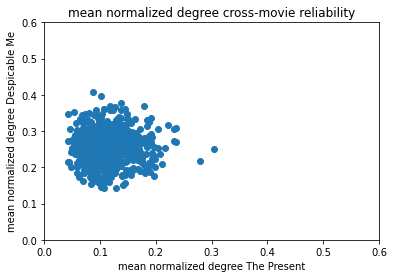

In [50]:
plt.scatter(degree_mean_tp,degree_mean_dm,vmax=1,vmin=0)
plt.title('mean normalized degree cross-movie reliability')
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])
plt.xlabel("mean normalized degree The Present")
plt.ylabel("mean normalized degree Despicable Me")

Text(0, 0.5, 'mean coreness score Despicable Me')

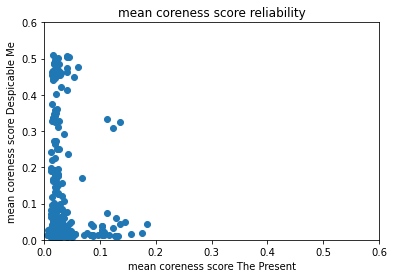

In [51]:
plt.scatter(coreness_mean_tp,coreness_mean_dm,vmax=1,vmin=0)
plt.title('mean coreness score reliability')
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])
plt.xlabel("mean coreness score The Present")
plt.ylabel("mean coreness score Despicable Me")

In [40]:
#load dx data
all_dx = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy')
sub_list = np.load('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy')
dx_array = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy')

sub_list = list(sub_list)

sub_ids = [s[4:] for s in sub_flist]

dx_count = 0
dne_count = 0

sub_list_w_dx = [] # ru subjects with diagnostic data available
dx_list_w_dx = [] # corresponding list of dx one hot data

for s in sub_ids:
    try:
        ind = sub_list.index(s)
        dx_count = dx_count+1
        sub_list_w_dx.append(sub_list[ind])
        dx_list_w_dx.append(dx_array[ind])
        
    except:
        #print("DNE")
        dne_count=dne_count+1
print(f"no dx data for: {dne_count}")
print(f"dx data for: {dx_count}")

dx_df = pd.DataFrame(dx_list_w_dx)
dx_df.columns = all_dx
dx_sum = dx_df.sum()
#print(dx_sum.to_string()) #list all dx and the number of subjects with that dx

no dx data for: 37
dx data for: 622


In [ ]:
adhd_inds = [0,1,2,58,99]
depression_inds = [27,45,60,74,101]
nt_inds = [50]
asd_inds = [9]